# YouTube Lecture Summarizer

# Part 1 - Get transcript text

In [ ]:
! pip install youtube_transcript_api -q

In [ ]:

#
video_url = "https://www.youtube.com/watch?v=Jhl23PNIWX0"

#
print("New York Pizza Vs. Italian Pizza")
video_url = "https://www.youtube.com/watch?v=qYOjBWIOBjM"

New York Pizza Vs. Italian Pizza


## Get id of video

In [ ]:

import sys
import re
import requests
from bs4 import BeautifulSoup
from youtube_transcript_api import YouTubeTranscriptApi

def extract_video_id(url):
    match = re.search(r"v=([a-zA-Z0-9_-]+)", url)
    if match:
        return match.group(1)
    else:
        raise ValueError("Invalid YouTube URL")

In [ ]:

video_id = extract_video_id(video_url)
print("Video ID:", video_id)

Video ID: qYOjBWIOBjM


# Extract metadata
## 1. Video Title
## 2. Channel name

In [ ]:

def extract_metadata(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.text, features="html.parser")
    title = soup.find("title").text
    channel = soup.find("link", itemprop="name")['content']
    return title, channel

In [ ]:

#
print("Title and channel name")
extract_metadata(video_url)

Title and channel name


('New York Pizza Vs. Italian Pizza - YouTube', 'Joshua Weissman')

# Thumbnail image of video

In [ ]:

def download_thumbnail(video_id):
    image_url = f"https://img.youtube.com/vi/{video_id}/hqdefault.jpg"
    img_data = requests.get(image_url).content
    with open('thumbnail.jpg', 'wb') as handler:
        handler.write(img_data)

In [ ]:

#
download_thumbnail(video_id)

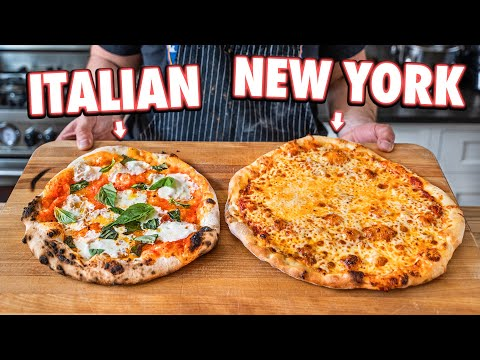

In [ ]:
# prompt: display local image

from IPython.display import Image, display

display(Image('thumbnail.jpg'))


# Get transcript

In [ ]:

def get_transcript(video_id):
    transcript_raw = YouTubeTranscriptApi.get_transcript(video_id, languages=['en', 'es', 'ko'])
    transcript_full = ' '.join([i['text'] for i in transcript_raw])
    return transcript_full

In [ ]:

#
def get_transcript(video_id):
    try:
        # Attempt to get the transcript in the specified languages
        transcript_raw = YouTubeTranscriptApi.get_transcript(video_id, languages=['en', 'es', 'ko'])
        transcript_full = ' '.join([i['text'] for i in transcript_raw])
        return transcript_full
    except Exception as e:
        # Catch any exception that occurs during transcript retrieval
        print(f"Could not retrieve transcript for video ID {video_id}. Error: {e}")
        return "" # Return an empty string or handle the error differently

In [ ]:

get_transcript(video_id)

"this feels like dangerous territory an endless battle waged to be ended [Music] so today it is italian versus american aka new york pizza let's go piss people off from got dang two different freaking continents what are you gonna do about that i know there's a lot of different american pizzas and there's a lot of different italian pizzas all right we picked two of my personal favorites new york and neapolitan they're both great pizzas so for the record before we even do this let's have it be a clean fight does that be a respectful fight and let's understand that pizza is delicious in many forms and i know that some people feel that the new york pizza is not a real pizza so let's define it today so with all that being said let's make this shall we so it's time we've got two very different doughs mr italiano which is just flour water salt yeast and the american version containing not only sugar but also being fermented completely different with significantly more yeast in a different ty

In [ ]:

#
transcript_text = get_transcript(video_id)
transcript_text

"this feels like dangerous territory an endless battle waged to be ended [Music] so today it is italian versus american aka new york pizza let's go piss people off from got dang two different freaking continents what are you gonna do about that i know there's a lot of different american pizzas and there's a lot of different italian pizzas all right we picked two of my personal favorites new york and neapolitan they're both great pizzas so for the record before we even do this let's have it be a clean fight does that be a respectful fight and let's understand that pizza is delicious in many forms and i know that some people feel that the new york pizza is not a real pizza so let's define it today so with all that being said let's make this shall we so it's time we've got two very different doughs mr italiano which is just flour water salt yeast and the american version containing not only sugar but also being fermented completely different with significantly more yeast in a different ty

# Part 2 - Summarize the transcript text

# Use new Cohere Chat model released in 2025

In [ ]:

# install
!pip install langchain-cohere -q

In [ ]:


import os

if not os.environ.get("COHERE_API_KEY"):
  os.environ["COHERE_API_KEY"] = "Q6nIsqJ4FX9XcZwlcQLSzA06z0oXYAGBw0jmCdbE"
  os.environ["COHERE_API_KEY"] = "shzT1LsOcPIyFHYTFogN75LtloP7XKnNXtLXnvba"

cohere_api_key = os.getenv("COHERE_API_KEY")

In [ ]:

from langchain_cohere import ChatCohere
from langchain_core.messages import HumanMessage, AIMessage

# Pass the API key as a keyword argument
llm = ChatCohere(cohere_api_key=cohere_api_key)

In [ ]:

import cohere
co = cohere.ClientV2(api_key=cohere_api_key)

In [ ]:

message = f"Summarize this text in one sentence\n{transcript_text}"

response = co.chat(
    model="command-a-03-2025",
    messages=[{"role": "user", "content": message}],
)

print(response.message.content[0].text)
response.message.content[0].text

In a playful and respectful comparison, the creator pits New York-style pizza against Neapolitan pizza, detailing the distinct dough, sauce, and cooking methods for each, ultimately declaring the Neapolitan version the winner due to its deeper flavor profile, while still acknowledging the deliciousness of both styles.


'In a playful and respectful comparison, the creator pits New York-style pizza against Neapolitan pizza, detailing the distinct dough, sauce, and cooking methods for each, ultimately declaring the Neapolitan version the winner due to its deeper flavor profile, while still acknowledging the deliciousness of both styles.'

In [ ]:

message = f"Generate a concise summary of this text\n{transcript_text}"
response = co.chat(
    model="command-a-03-2025",
    messages=[{"role": "user", "content": message}],
)
print(response.message.content[0].text)
response.message.content[0].text


The text is a lively comparison between New York (American) and Neapolitan (Italian) pizzas, highlighting their distinct doughs, sauces, and cooking methods. The American dough includes sugar and more yeast, fermented differently, while the Italian version is simpler, using Tipo 00 flour and less yeast, cold-fermented for 24 hours. The American sauce is more complex, with butter, garlic, and spices, whereas the Italian sauce is minimalist, using San Marzano tomatoes and olive oil. The American pizza is baked in a home oven at 500°F, topped with a mix of cheeses, while the Italian pizza is cooked in a 750°F oven, featuring fresh buffalo mozzarella and basil. The host prefers the Neapolitan pizza for its depth of flavor and balance, though both are praised for their unique qualities. The comparison ends with a lighthearted acknowledgment of both styles' merits, emphasizing personal preference and respect for both traditions.


"The text is a lively comparison between New York (American) and Neapolitan (Italian) pizzas, highlighting their distinct doughs, sauces, and cooking methods. The American dough includes sugar and more yeast, fermented differently, while the Italian version is simpler, using Tipo 00 flour and less yeast, cold-fermented for 24 hours. The American sauce is more complex, with butter, garlic, and spices, whereas the Italian sauce is minimalist, using San Marzano tomatoes and olive oil. The American pizza is baked in a home oven at 500°F, topped with a mix of cheeses, while the Italian pizza is cooked in a 750°F oven, featuring fresh buffalo mozzarella and basil. The host prefers the Neapolitan pizza for its depth of flavor and balance, though both are praised for their unique qualities. The comparison ends with a lighthearted acknowledgment of both styles' merits, emphasizing personal preference and respect for both traditions."

In [ ]:

message = f"Provide summary in 5 bullet points\n{transcript_text}"

response = co.chat(
    model="command-a-03-2025",
    messages=[{"role": "user", "content": message}],
)

print(response.message.content[0].text)


Here’s a concise summary of the content in 5 bullet points:

- **Comparison Focus**: The video compares Italian (Neapolitan) and American (New York) pizzas, highlighting differences in dough, sauce, and cooking methods.  
- **Dough Variations**: Italian dough uses simple ingredients (flour, water, salt, yeast) with a 24-hour fridge fermentation, while American dough includes sugar, more yeast, and a shorter room-temp rise.  
- **Sauce Differences**: American sauce is cooked with butter, garlic, red pepper flakes, and sugar, while Italian sauce is raw, blending San Marzano tomatoes, garlic, and olive oil.  
- **Cooking Techniques**: Italian pizza is baked in a 750°F wood-fired oven for ~1 minute, while American pizza uses a home oven with a baking steel at 500°F for 5–7 minutes.  
- **Taste Verdict**: The host prefers the Italian pizza for its depth of flavor and balance, though both are acknowledged as delicious in their own right.


In [ ]:

message = f"Summar\n{document}"

response = co.chat(
    model="command-a-03-2025",
    messages=[{"role": "user", "content": message}],
)

print(response.message.content[0].text)


In [ ]:

import os
from openai import OpenAI

def summarize_text_cohere(text, lang='en'):
    #OpenAI.api_key = os.getenv("OPENAI_API_KEY")
    #client = OpenAI(api_key=OpenAI.api_key)
    client = llm

    prompt = f"""
    The following text is in its original language. Provide the output in this language: {lang}.
    Format the output as follows:

    Summary:
    short summary of the video

    Key Takeaways:
    succinct bullet point list of key takeaways

    input text: {text}
    """

    response = client.chat.completions.create(
        messages=[{"role": "user", "content": prompt}],
        model="gpt-3.5-turbo",
        #model="gpt-4-turbo", # better performance, slower inference
    )

    summary_text = response.to_dict()['choices'][0]['message']['content']
    return summary_text

In [ ]:

# summarize_text_cohere(transcript_text)

AttributeError: 'ChatCohere' object has no attribute 'chat'

In [ ]:

import os
from openai import OpenAI

def summarize_text(text, lang='en'):
    OpenAI.api_key = os.getenv("OPENAI_API_KEY")
    client = OpenAI(api_key=OpenAI.api_key)

    prompt = f"""
    The following text is in its original language. Provide the output in this language: {lang}.
    Format the output as follows:

    Summary:
    short summary of the video

    Key Takeaways:
    succinct bullet point list of key takeaways

    input text: {text}
    """

    response = client.chat.completions.create(
        messages=[{"role": "user", "content": prompt}],
        model="gpt-3.5-turbo",
        #model="gpt-4-turbo", # better performance, slower inference
    )

    summary_text = response.to_dict()['choices'][0]['message']['content']
    return summary_text